In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.append(os.path.abspath("../../"))
from dotenv import load_dotenv
load_dotenv()

True

# <a id='toc1_'></a>[LLamaparse](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [LLamaparse](#toc1_)    
- [Результаты](#toc2_)    
  - [Ссылки](#toc2_1_)    
  - [Заметки](#toc2_2_)    
    - [Мои тесты](#toc2_2_1_)    
    - [LLamaParse 101](#toc2_2_2_)    
    - [Выжимки из документации](#toc2_2_3_)    
      - [Multimodal parsing](#toc2_2_3_1_)    
      - [Разбор примеров](#toc2_2_3_2_)    
        - [Parsing pptx](#toc2_2_3_2_1_)    
        - [multimodal contextual retrieval](#toc2_2_3_2_2_)    
- [LLamaParse c GPT-4o](#toc3_)    
    - [Презентация про энергетический переход](#toc3_1_1_)    
      - [Слайд с графиком](#toc3_1_1_1_)    
      - [Слайд с барчартами и графиком](#toc3_1_1_2_)    
      - [Слайд с таблицей из графиков](#toc3_1_1_3_)    
      - [Слайд с геоданными](#toc3_1_1_4_)    
      - [Слайд с картинкой](#toc3_1_1_5_)    
    - [Кастомный промпт для презентация про энергетический переход](#toc3_1_2_)    
        - [Слайд с графиком](#toc3_1_2_1_1_)    
        - [Слайд с барчартами и графиком](#toc3_1_2_1_2_)    
        - [Слайд с таблицей из графиков](#toc3_1_2_1_3_)    
        - [Слайд с геоданными](#toc3_1_2_1_4_)    
        - [Слайд с картинкой](#toc3_1_2_1_5_)    
    - [Презентация про гос-поддержку](#toc3_1_3_)    
      - [Слайд с таблицей с объединенными ячейками](#toc3_1_3_1_)    
      - [Слайд с таблицей и списками](#toc3_1_3_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Результаты](#toc0_)
## <a id='toc2_1_'></a>[Ссылки](#toc0_)
- [Website](https://cloud.llamaindex.ai/)
- [Documentation](https://docs.cloud.llamaindex.ai/llamaparse/getting_started)
- [llama\_parse/examples github](https://github.com/run-llama/llama_parse/tree/main/examples)
## <a id='toc2_2_'></a>[Заметки](#toc0_)
### <a id='toc2_2_1_'></a>[Мои тесты](#toc0_)
- парсит графики и таблицы в маркдаун таблицы
- не описывает картинки и визуальные элементы
	- поэтому не распарсил слайд с геоданными 
- теряет элементы слайда
- пишет на английском если задать кастомный промпт на русском
	- При этом парсит менее информативно, чем в тестах с только GPT-4о

### <a id='toc2_2_2_'></a>[LLamaParse 101](#toc0_)
- Парсит текст и таблицы
- Картинки просто индексирует по типу (страница, координаты)
- Проект фокусируется на документах. В примерах у них в основном таблицы, текст, формы заявлений.

### <a id='toc2_2_3_'></a>[Выжимки из документации](#toc0_)

#### <a id='toc2_2_3_1_'></a>[Multimodal parsing](#toc0_)
[docs](https://docs.cloud.llamaindex.ai/llamaparse/features/multimodal)
```
When using this mode, LlamaParse's regular parsing is bypassed and instead the following process is used:

- A screenshot of every page of your document is taken
- Each page screenshot is sent to the multimodal with instruction to extract as `markdown`
- The resulting markdown of each page is consolidated into the final result.
```

Видимо, их инструкции не включают визуальные элементы.

#### <a id='toc2_2_3_2_'></a>[Разбор примеров](#toc0_)
##### <a id='toc2_2_3_2_1_'></a>[Parsing pptx](#toc0_)
[notebook](https://github.com/run-llama/llama_parse/blob/main/examples/other_files/demo_ppt_basic.ipynb)

**Разметка слайдов.** 
Перед каждым слайдом добавляют такое:

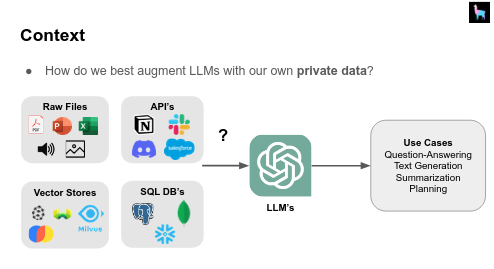

```
|Context|
|---|
|How do we best augment LLMs with our own private data?|
|Raw Files|API’s|
| |salesforce|?|
| | |Use Cases|
| | |Question-Answering|
| | |Text Generation|
| | |Summarization|
|Vector Stores|SQL DB’s|
| | |Planning|
| |LLM’s|
| |Milvus|
``` 

**Парсят текст дословно.**
Нет анализа графиков, описания диаграм. Выделяют изображения, но отдельно.
![rag pipeline](https://github.com/run-llama/llama_parse/blob/main/examples/multimodal/multimodal_contextual_retrieval_rag_img.png?raw=true)

##### <a id='toc2_2_3_2_2_'></a>[multimodal contextual retrieval](#toc0_)
[notebook](https://github.com/run-llama/llama_parse/blob/main/examples/multimodal/multimodal_contextual_retrieval_rag.ipynb)
Парсят одну презентацию для RAG. 
- LLamaParse достает картинки и изображения
	- текст в markdown
	- структура слайда в их формате
	- **картинки отдельно** - парсят в формате (страница, файл, координаты)
- GPT-4о используется для генерации ответа
	- VectorIndex ретривит слайд по текстовому запросу
	- В гпт подают текстовое описание и картинки.

**Картинки не входят в векторную базу**
Их система не сможет отвечать на вопросы по визуальному содержимому. Они не добавляют информацию о картинках в финальный markdown – только ссылки на них. 

Описание из ноутбука:
```
# Building Multimodal Index
In this section we build the multimodal index over the parsed deck.

We do this by creating **text** nodes from the document that contain metadata referencing the original image path.

In this example we're indexing the text node for retrieval. The text node has a reference to both the parsed text as well as the image screenshot.
```

То есть их парсинг содержит только пути до картинок. 

**Мультимодальность в их случае**: при поиске в GPT-4o подаются изображения со слайда. 

Промпт для GPT-4о:
```
Below we give parsed text from slides in two different formats, as well as the image.

---------------------
{context_str}
---------------------
Given the context information and not prior knowledge, answer the query. Explain whether you got the answer
from the parsed markdown or raw text or image, and if there's discrepancies, and your reasoning for the final answer.

Query: {query_str}
Answer:
```


In [ ]:
from src import (
    ImageEncodeChain,
    VisionAnalysisChain
)
from src import page2image
from src.config import Navigator
from textwrap import dedent
from langchain_openai import ChatOpenAI
import os
import fitz  # PyMuPDF
import matplotlib.pyplot as plt

from src.config import MultilineWrapper
from IPython.display import display, Markdown

/usr/lib/python3.10/inspect.py:756: RuntimeWarning: coroutine 'LlamaParse.aload_data' was never awaited
  for line in lines[1:]:


In [ ]:
nav = Navigator()
text_wrapper = MultilineWrapper(width=100)

def get_file(fname_substr):
    files = nav.find_file_by_substr(
        fname_substr,
        base_dir=nav.raw / "weird-slides"
    )
    file = files[0]
    return file

def get_pdf_page(fpath, page):
    pdf = fitz.open(fpath)
    pdf_page = pdf[page]
    return pdf_page

def display_slide(fpath, page, figsize=(10, 10)):
    pdf_page = get_pdf_page(fpath, page)
    pil_image = page2image(pdf_page)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(pil_image)
    ax.axis('off')
    plt.show()


files = []

# Слайд с графиком
files.append(get_file("ЯиП_Энергетический_переход_Вызовы_и_возможности") )

# Слайд с таблицей
files.append(get_file("SP_Навигатор_по_мерам_гос_поддержки") )

# <a id='toc3_'></a>[LLamaParse c GPT-4o](#toc0_)

In [7]:
# llama-parse is async-first, running the sync code in a notebook requires the use of nest_asyncio
import nest_asyncio
nest_asyncio.apply()

from llama_parse import LlamaParse


parser = LlamaParse(
    result_type="markdown",
    use_vendor_multimodal_model=True,
    vendor_multimodal_model_name="openai-gpt4o",
    language="ru",

)

In [8]:
out = parser.load_data(files[0])

Started parsing the file under job_id 7f5a82df-59a7-43bb-8ed2-708bf39c3a9b


In [ ]:
from pprint import pprint

document = out[0]
pprint(list(document.to_dict().keys()))

['id_',
 'embedding',
 'metadata',
 'excluded_embed_metadata_keys',
 'excluded_llm_metadata_keys',
 'relationships',
 'text',
 'mimetype',
 'start_char_idx',
 'end_char_idx',
 'text_template',
 'metadata_template',
 'metadata_seperator',
 'class_name']


### <a id='toc3_1_1_'></a>[Презентация про энергетический переход](#toc0_)

#### <a id='toc3_1_1_1_'></a>[Слайд с графиком](#toc0_)

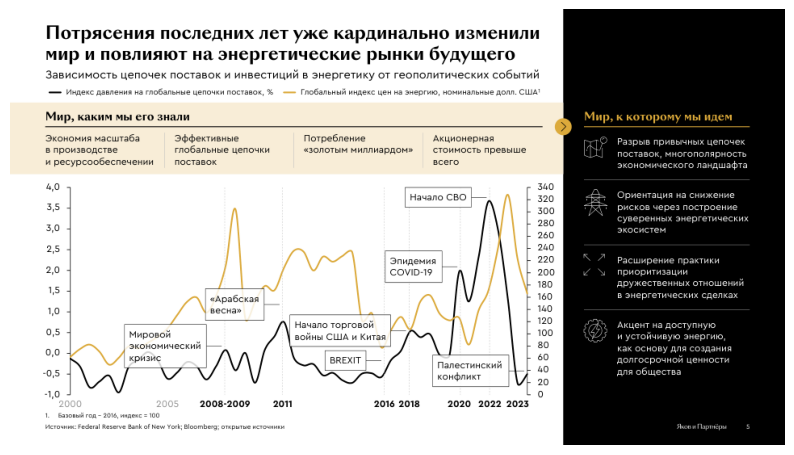

# Потрясения последних лет уже кардинально изменили мир и повлияют на энергетические рынки будущего

Зависимость цепочек поставок и инвестиций в энергетику от геополитических событий

- **Индекс давления на глобальные цепочки поставок, %**
- **Глобальный индекс цен на энергию, номинальные долл. США**

## Мир, каким мы его знали

- Экономия масштаба в производстве и ресурсообеспечении
- Эффективные глобальные цепочки поставок
- Потребление «золотым миллиардом»
- Акционерная стоимость превыше всего

### График

| Год  | Событие                                |
|------|----------------------------------------|
| 2000 | Мировой экономический кризис           |
| 2008 | «Арабская весна»                       |
| 2016 | BREXIT                                 |
| 2018 | Начало торговой войны США и Китая      |
| 2020 | Эпидемия COVID-19                      |
| 2022 | Начало СВО                             |
| 2023 | Палестинский конфликт                  |

1. Базовый год – 2016, индекс = 10

In [ ]:
document = out[0]
display_slide(files[0], 0)
print(text_wrapper.fill(document.text))

#### <a id='toc3_1_1_2_'></a>[Слайд с барчартами и графиком](#toc0_)
- Парсит данные с графика в markdown-таблицу 

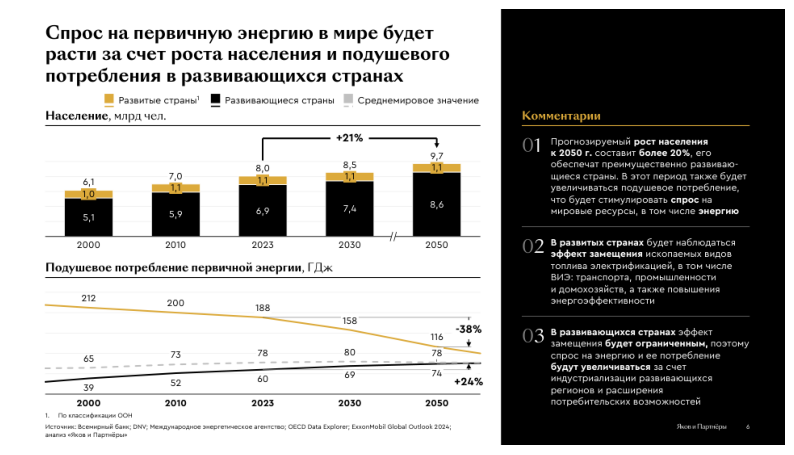

# Спрос на первичную энергию в мире будет расти за счет роста населения и подушевого потребления в развивающихся странах

### Население, млрд чел.

| Год  | Развитые страны | Развивающиеся страны | Среднемировое значение |
|------|-----------------|----------------------|------------------------|
| 2000 | 1.0             | 5.1                  | 6.1                    |
| 2010 | 1.1             | 5.9                  | 7.0                    |
| 2023 | 1.1             | 6.9                  | 8.0                    |
| 2030 | 1.1             | 7.4                  | 8.5                    |
| 2050 | 1.1             | 8.6                  | 9.7                    |

### Подушевое потребление первичной энергии, ГДж

| Год  | Развитые страны | Развивающиеся страны | Среднемировое значение |
|------|-----------------|----------------------|------------------------|
| 2000 | 212             | 39                   | 65                     |
| 2010 | 200             | 52                   | 7

In [ ]:
document = out[1]
display_slide(files[0], 1)
print(text_wrapper.fill(document.text))

#### <a id='toc3_1_1_3_'></a>[Слайд с таблицей из графиков](#toc0_)
- Игнорит графики в ячейках таблицы

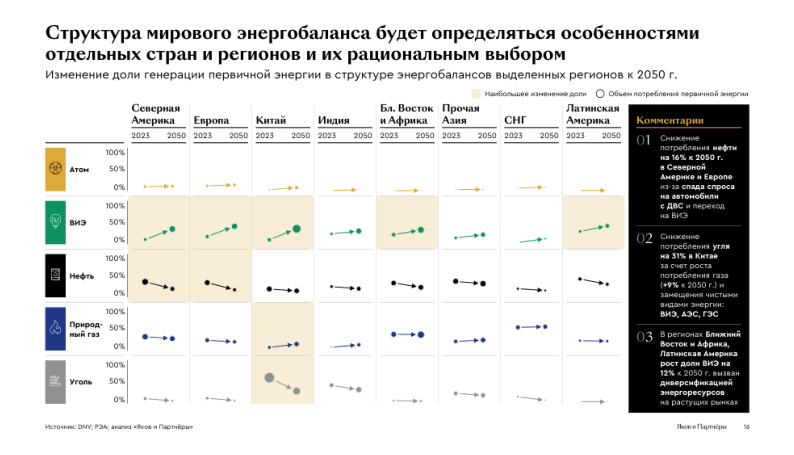

# Структура мирового энергобаланса будет определяться особенностями отдельных стран и регионов и их рациональным выбором

Изменение доли генерации первичной энергии в структуре энергобалансов выделенных регионов к 2050 г.

|                | Северная Америка | Европа | Китай | Индия | Бл. Восток и Африка | Прочая Азия | СНГ | Латинская Америка |
|----------------|------------------|--------|-------|-------|---------------------|-------------|-----|-------------------|
|                | 2023 | 2050       | 2023 | 2050  | 2023 | 2050               | 2023 | 2050   | 2023 | 2050             | 2023 | 2050 | 2023 | 2050 |
| Атом           |      |            |      |       |      |                     |      |       |      |                 |      |     |      |     |
| ВИЭ            |      |            |      |       |      |                     |      |       |      |                 |      |     |      |     |
| Нефть          |      |            |      |       |      |                 

In [ ]:
document = out[2]
display_slide(files[0], 2)
print(document.text)

#### <a id='toc3_1_1_4_'></a>[Слайд с геоданными](#toc0_)
- Не дает описания геоданных

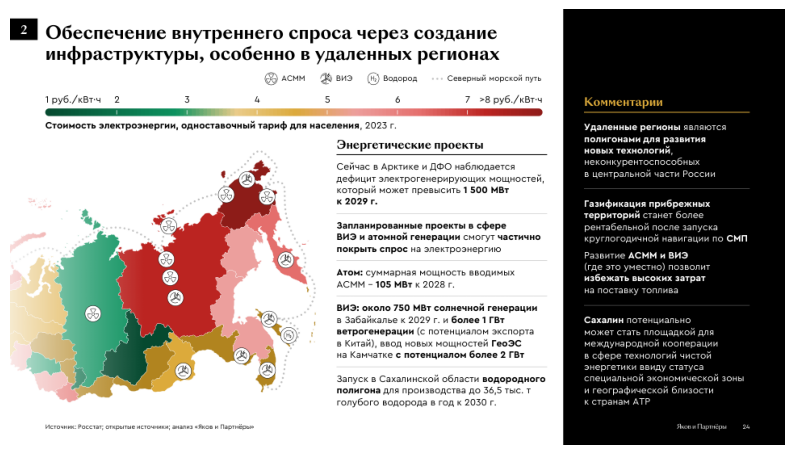

# Обеспечение внутреннего спроса через создание инфраструктуры, особенно в удаленных регионах

### Стоимость электроэнергии, одноставочный тариф для населения, 2023 г.

- **1 руб./кВт·ч** 
- **2 руб./кВт·ч**
- **3 руб./кВт·ч**
- **4 руб./кВт·ч**
- **5 руб./кВт·ч**
- **6 руб./кВт·ч**
- **7 руб./кВт·ч**
- **>8 руб./кВт·ч**

### Энергетические проекты

- Сейчас в Арктике и ДФО наблюдается дефицит электрогенерирующих мощностей, который может превысить **1 500 МВт к 2029 
г.**

- Запланированные проекты в сфере ВИЭ и атомной генерации смогут частично покрыть спрос на электроэнергию

- **Атом**: суммарная мощность вводимых АСММ – **105 МВт к 2028 г.**

- **ВИЭ**: около **750 МВт солнечной генерации** в Забайкалье к 2029 г. и **более 1 ГВт ветроэнергии** (с потенциалом 
экспорта в Китай), ввод новых мощностей ГеоЭС на Камчатке с потенциалом **более 2 ГВт**

- Запуск в Сахалинской области водородного полигона для производства **35,6 тыс. т. голубого водорода в год к 2030 г.**

### Комментарии


In [ ]:
document = out[3]
display_slide(files[0], 3)
print(text_wrapper.fill(document.text))

#### <a id='toc3_1_1_5_'></a>[Слайд с картинкой](#toc0_)

- Ни слова о картинке
- Распарсил текст как таблицу
- Не указал "Яков и Партнеры" 

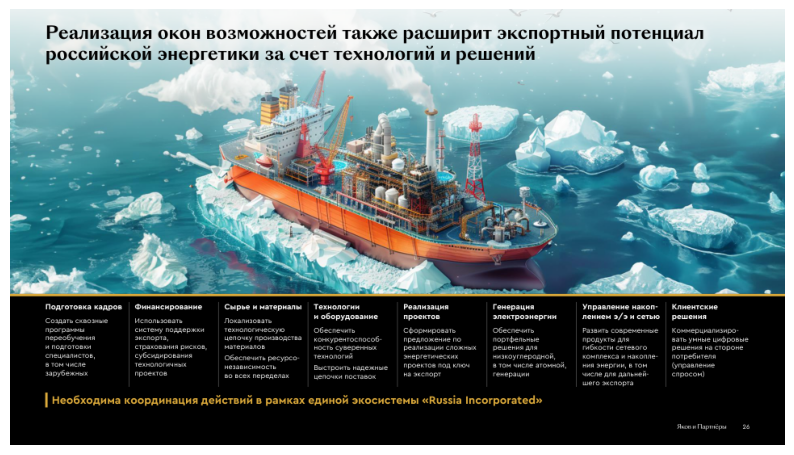

# Реализация окон возможностей также расширит экспортный потенциал российской энергетики за счет технологий и решений

| Подготовка кадров | Финансирование | Сырье и материалы | Технологии и оборудование | Реализация проектов | Генерация электроэнергии | Управление накоплением Э/Э и сетью | Клиентские решения |
|-------------------|----------------|-------------------|---------------------------|---------------------|--------------------------|-----------------------------------|-------------------|
| Создать сквозные программы переобучения и подготовки специалистов, в том числе зарубежных | Использовать систему поддержки экспорта, страхования рисков, субсидирования технологических проектов | Локализовать технологическую цепочку производства материалов Обеспечить ресурсонезависимость во всех переделах | Обеспечить конкурентоспособность суверенных технологий Выстроить надежные цепочки поставок | Сформировать предложение по реализации сложных энергетических проектов под ключ на экспорт | Обеспечить портфельные решения для низкоуглеродной, в том числе атомной, генерации | Развить современные продукты для гибкости сетевого комплекса и накопления энергии, в том числе для дальнейшего экспорта | Коммерциализировать умные цифровые решения на стороне потребителя (управление спросом) |

**Необходима координация действий в рамках единой экосистемы «Russia Incorporated»**

In [50]:
document = out[4]
display_slide(files[0], 4)
display(Markdown(document.text))


---


### <a id='toc3_1_2_'></a>[Кастомный промпт для презентация про энергетический переход](#toc0_)

- Взял промпт из прошлых тестов: типа `я ничего не вижу, опиши слайд`
- ГПТ выдал описание на английском
- Это описание аналогично тому, что я получал в прошлых тестах
- Теперь не парсит данные в таблицы.

In [ ]:
parser = LlamaParse(
    result_type="markdown",
    use_vendor_multimodal_model=True,
    vendor_multimodal_model_name="openai-gpt4o",
    language="ru",
    parsing_instruction=dedent(
        """\
        Представь, что я ничего не вижу. \
        Я пришлю тебе слайд из презентации, а ты опиши его. \
        Передай мне содержимое слайда в мельчайших подробностях.
        """)
)
out = parser.load_data(files[0])

Started parsing the file under job_id 3506d139-1ef2-4c7a-9264-41a4a4aa72ce


##### <a id='toc3_1_2_1_1_'></a>[Слайд с графиком](#toc0_)

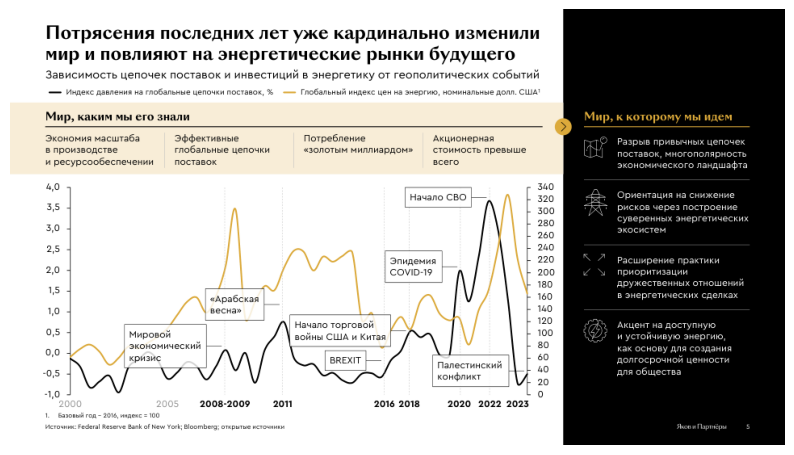

The slide discusses how recent global events have significantly impacted the world and will influence future energy 
markets. It highlights the dependency of supply chains and energy investments on geopolitical events.

### Key Elements:

#### Title:
- "Потрясения последних лет уже кардинально изменили мир и повлияют на энергетические рынки будущего"

#### Graph:
- **Y-Axis (Left):** Index of pressure on global supply chains (%)
- **Y-Axis (Right):** Global energy price index (nominal USD)
- **Timeline:** 2000 to 2023
- **Events Marked:**
  - Global economic crisis
  - Arab Spring
  - US-China trade war
  - BREXIT
  - COVID-19 pandemic
  - Palestinian conflict
  - Start of a military operation (СВО)

#### Sections:
- **"Мир, каким мы его знали" (The World as We Knew It):**
  - Scale economy in production and resource provision
  - Efficient supply chains
  - Consumption by the "golden billion"
  - Shareholder value above all

- **"Мир, к которому мы идем" (The World We Are Heading Towa

In [ ]:
document = out[0]
display_slide(files[0], 0)
print(text_wrapper.fill(document.text))

##### <a id='toc3_1_2_1_2_'></a>[Слайд с барчартами и графиком](#toc0_)

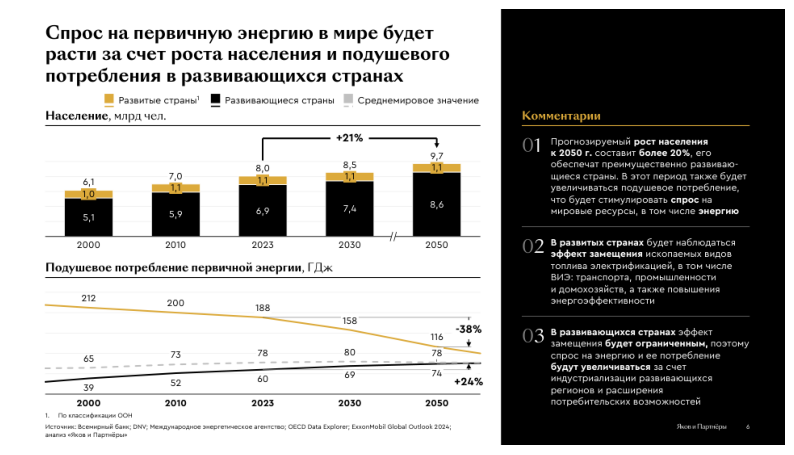

The slide presents information on the projected growth in global primary energy demand due to 
population growth and per capita consumption in developing countries.

### Population Growth (in billions):
- **2000**: 
  - Developed countries: 1.0
  - Developing countries: 5.1
  - Total: 6.1
- **2010**: 
  - Developed countries: 1.1
  - Developing countries: 5.9
  - Total: 7.0
- **2023**: 
  - Developed countries: 1.1
  - Developing countries: 6.9
  - Total: 8.0
- **2030**: 
  - Developed countries: 1.1
  - Developing countries: 7.4
  - Total: 8.5
- **2050**: 
  - Developed countries: 1.1
  - Developing countries: 8.6
  - Total: 9.7

### Per Capita Primary Energy Consumption (in GJ):
- **2000**: 
  - Developed countries: 212
  - Developing countries: 39
  - Average: 65
- **2010**: 
  - Developed countries: 200
  - Developing countries: 52
  - Average: 73
- **2023**: 
  - Developed countries: 188
  - Developing countries: 60
  - Average: 78
- **2030**: 
  - Developed countries: 158
  - Dev

In [ ]:
document = out[1]
display_slide(files[0], 1)
print(text_wrapper.fill(document.text))

##### <a id='toc3_1_2_1_3_'></a>[Слайд с таблицей из графиков](#toc0_)
- В прошлых тестах подробнее описывал таблицу

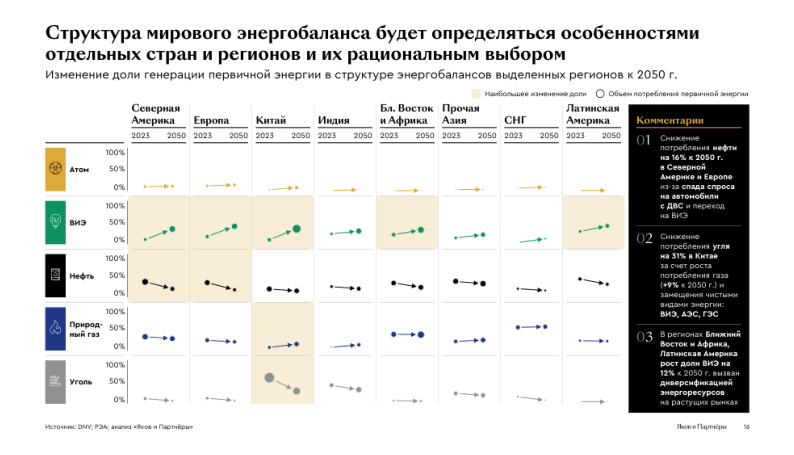

The slide presents a chart showing the projected changes in the share of primary energy generation 
in different regions by 2050. The regions include North America, Europe, China, India, the Middle 
East and Africa, Other Asia, CIS, and Latin America. The energy sources are nuclear (атом), 
renewable energy (ВИЭ), oil (нефть), natural gas (природный газ), and coal (уголь).

Key observations:

1. **Nuclear Energy**: Minimal changes across most regions, with slight increases in some areas.
2. **Renewable Energy**: Significant increases in all regions, especially in Europe and China.
3. **Oil**: Decreases in North America and Europe, with stable or slight changes in other regions.
4. **Natural Gas**: Increases in China and the Middle East and Africa, with stable or slight changes
 elsewhere.
5. **Coal**: Decreases in China and stable or slight changes in other regions.

Comments on the right highlight:

1. A 16% reduction in oil consumption by 2050 in North America and Europe due to decre

In [ ]:
document = out[2]
display_slide(files[0], 2)
print(text_wrapper.fill(document.text))

##### <a id='toc3_1_2_1_4_'></a>[Слайд с геоданными](#toc0_)

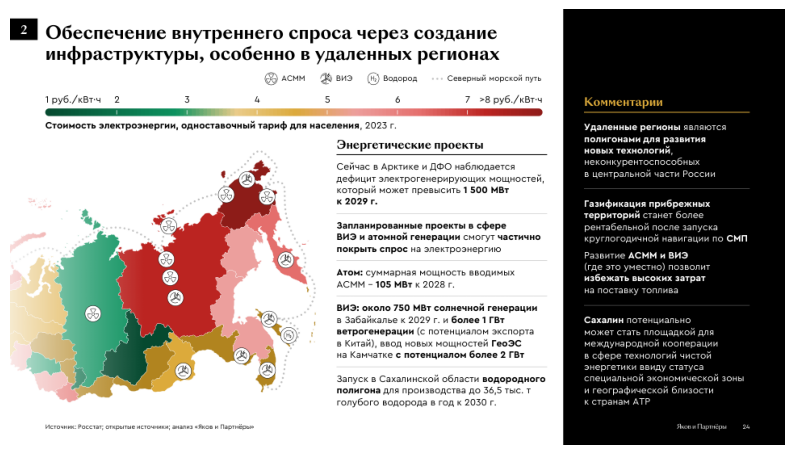

The slide is titled "Обеспечение внутреннего спроса через создание инфраструктуры, особенно в 
удаленных регионах" (Ensuring Domestic Demand through Infrastructure Development, Especially in 
Remote Regions).

### Map:
- A map of Russia is shown with regions colored according to the cost of electricity (in rubles per 
kWh) for 2023. The color gradient ranges from green (1 ruble/kWh) to dark red (>8 rubles/kWh).
- Icons on the map represent different energy projects: nuclear (атом), wind (ветрогенерация), and 
hydrogen (водород).

### Energy Projects:
- **Current Situation**: There is a deficit of electricity generation capacity in the Arctic and Far
 Eastern Federal Districts, which may exceed 1,500 MW by 2029.
- **Planned Projects**: Projects in renewable energy and nuclear generation will partially cover the
 electricity demand.
  - **Nuclear**: Total capacity of new nuclear power plants (АСММ) is 105 MW by 2028.
  - **Renewable Energy**: 
    - About 750 MW of solar generation in Tr

In [ ]:
document = out[3]
display_slide(files[0], 3)
print(text_wrapper.fill(document.text))

##### <a id='toc3_1_2_1_5_'></a>[Слайд с картинкой](#toc0_)


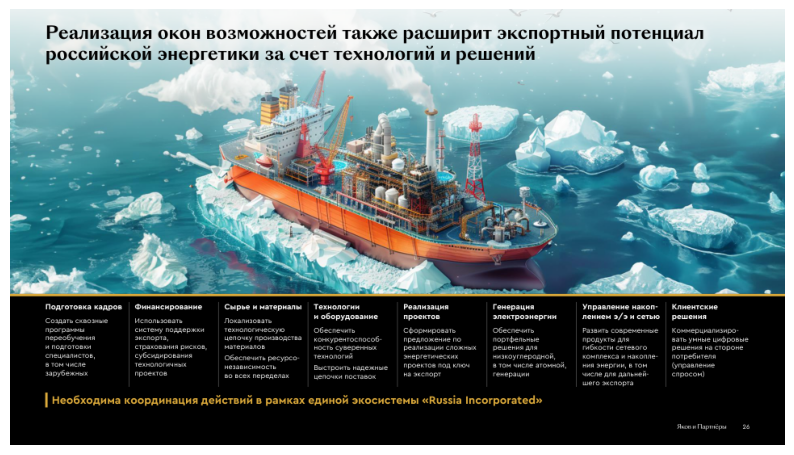

The slide features an illustration of an industrial ship navigating through icy waters, surrounded 
by icebergs. Above the image, the text reads: "Реализация окон возможностей также расширит 
экспортный потенциал российской энергетики за счет технологий и решений."

Below the image, there is a black section with several columns of text, each with a heading:

1. **Подготовка кадров**: 
   - Создать сквозные программы переобучения и подготовки специалистов, в том числе зарубежных.

2. **Финансирование**: 
   - Использовать систему поддержки экспорта, страхования рисков, субсидирования технологических 
проектов.

3. **Сырье и материалы**: 
   - Локализовать технологическую цепочку производства материалов.
   - Обеспечить ресурсонезависимость во всех переделах.

4. **Технологии и оборудование**: 
   - Обеспечить конкурентоспособность суверенных технологий.
   - Выстроить надежные цепочки поставок.

5. **Реализация проектов**: 
   - Сформировать предложение по реализации сложных энергетичес

In [67]:
document = out[4]
display_slide(files[0], 4)

print(text_wrapper.fill(document.text))


---


### <a id='toc3_1_3_'></a>[Презентация про гос-поддержку](#toc0_)

In [68]:
parser = LlamaParse(
    result_type="markdown",
    use_vendor_multimodal_model=True,
    vendor_multimodal_model_name="openai-gpt4o",
    language="ru",

)
out = parser.load_data(files[1])

Started parsing the file under job_id 59af9818-dfea-414e-8d00-52b10433fa99


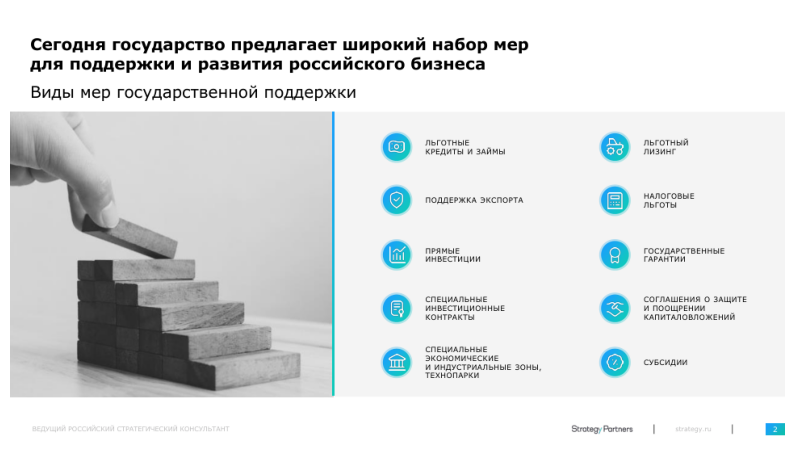

# Сегодня государство предлагает широкий набор мер для поддержки и развития российского бизнеса

## Виды мер государственной поддержки

- Льготные кредиты и займы
- Льготный лизинг
- Поддержка экспорта
- Налоговые льготы
- Прямые инвестиции
- Государственные гарантии
- Специальные инвестиционные контракты
- Соглашения о защите и поощрении капиталовложений
- Специальные экономические и индустриальные зоны, технопарки
- Субсидии

----

ВЕДУЩИЙ РОССИЙСКИЙ СТРАТЕГИЧЕСКИЙ КОНСУЛЬТАНТ

Strategy Partners | strategy.ru


In [ ]:
document = out[0]
display_slide(files[1], 0)

print(text_wrapper.fill(document.text))

#### <a id='toc3_1_3_1_'></a>[Слайд с таблицей с объединенными ячейками](#toc0_)
- Не распарсил объединенные ячейки
- Распарсил в маркдаун

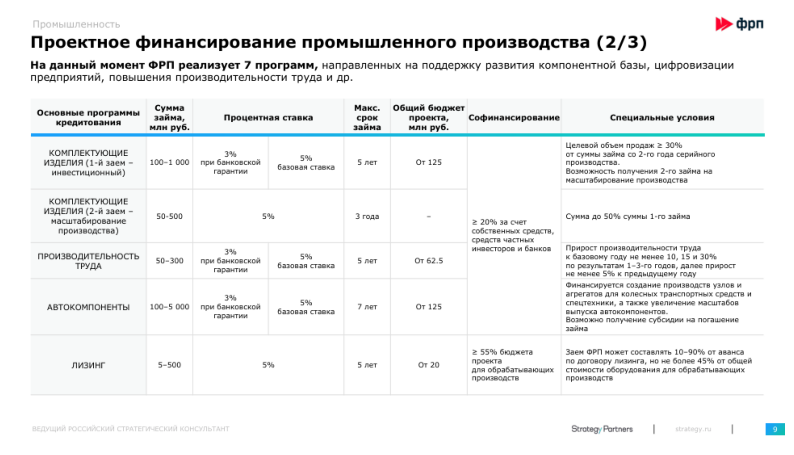

# Промышленность

## Проектное финансирование промышленного производства (2/3)

На данный момент ФРП реализует 7 программ, направленных на поддержку развития компонентной базы, цифровизации предприятий, повышения производительности труда и др.

| Основные программы кредитования | Сумма займа, млн руб. | Процентная ставка | Макс. срок займа | Общий бюджет проекта, млн руб. | Софинансирование | Специальные условия |
|---------------------------------|-----------------------|-------------------|------------------|-------------------------------|------------------|---------------------|
| КОМПЛЕКТУЮЩИЕ ИЗДЕЛИЯ (1-й заем – инвестиционный) | 100–1 000 | 3% при банковской гарантии<br>5% базовая ставка | 5 лет | От 125 | | Целевой объем продаж ≥ 30% от суммы займа со 2-го года серийного производства. Возможность получения 2-го займа на масштабирование производства |
| КОМПЛЕКТУЮЩИЕ ИЗДЕЛИЯ (2-й заем – масштабирование производства) | 50–500 | 5% | 3 года | – | ≥ 20% за счет собственных средств, средств частных инвесторов и банков | Сумма до 50% суммы 1-го займа |
| ПРОИЗВОДИТЕЛЬНОСТЬ ТРУДА | 50–300 | 3% при банковской гарантии<br>5% базовая ставка | 5 лет | От 62.5 | | Прирост производительности труда к базовому году не менее 10, 15 и 30% по результатам 1–3-го года, далее прирост не менее 5% к предыдущему году |
| АВТОКОМПОНЕНТЫ | 100–5 000 | 3% при банковской гарантии<br>5% базовая ставка | 7 лет | От 125 | | Финансируется создание производств узлов и агрегатов для колесных транспортных средств и спецтехники, а также увеличение масштабов выпуска автокомпонентов. Возможно получение субсидии на погашение займа |
| ЛИЗИНГ | 5–500 | 5% | 5 лет | От 20 | | ≥ 55% бюджета проекта для обрабатывающих производств. Заем ФРП может составлять 10–90% от аванса по договору лизинга, но не более 45% от общей стоимости оборудования для обрабатывающих производств |

None


In [ ]:
document = out[1]
display_slide(files[1], 1)

print(display(Markdown(document.text)))

#### <a id='toc3_1_3_2_'></a>[Слайд с таблицей и списками](#toc0_)
- Потерял список в правом верхнем углу

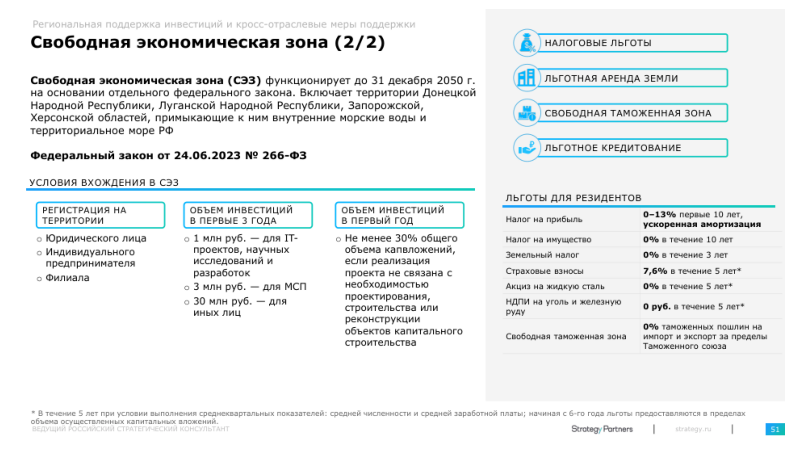

# Региональная поддержка инвестиций и кросс-отраслевые меры поддержки

## Свободная экономическая зона (2/2)

Свободная экономическая зона (СЭЗ) функционирует до 31 декабря 2050 г. на основании отдельного 
федерального закона. Включает территории Донецкой Народной Республики, Луганской Народной 
Республики, Запорожской, Херсонской областей, примыкающие к ним внутренние морские воды и 
территориальное море РФ.

**Федеральный закон от 24.06.2023 № 266-ФЗ**

### Условия вхождения в СЭЗ

#### Регистрация на территории
- Юридического лица
- Индивидуального предпринимателя
- Филиала

#### Объем инвестиций в первые 3 года
- 1 млн руб. — для IT-проектов, научных исследований и разработок
- 3 млн руб. — для МСП
- 30 млн руб. — для иных лиц

#### Объем инвестиций в первый год
- Не менее 30% общего объема капвложений, если реализация проекта не связана с необходимостью 
проектирования, строительства или реконструкции объектов капитального строительства

### Льготы для резидентов

| Льгота        

In [74]:
document = out[2]
display_slide(files[1], 2)

print((text_wrapper.fill(document.text)))